To solve this exercise we do not use the _LogisticRegression_ hyperparameters that were defined in point 5; this time we leave the default values `max_iter=100, solver='lbfgs', penalty='l2'`

In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Load MNIST dataset
X, y  = fetch_openml(data_id=554, parser='auto', return_X_y=True) # https://www.openml.org/d/554

# Select only 0s and 8s
num=['0','8']
y1 = y.isin(num)
indices = y1[y1].index
X = X.loc[indices]
y = y.loc[indices]

# Reset index after class selection
X.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### dimensionality reduction to 2 features using _PCA_

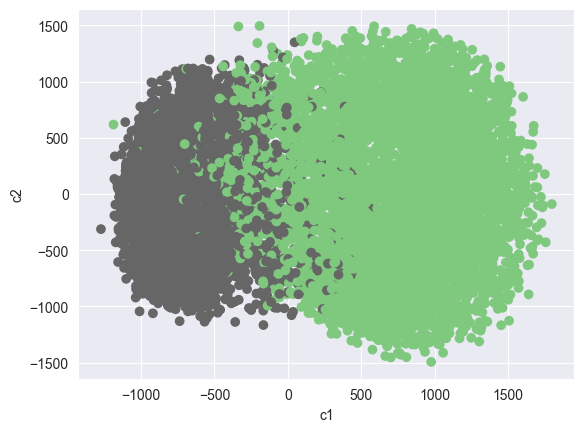

In [92]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot the 2 new features generated by PCA
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train.astype('int32'), cmap='Accent')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

In [93]:
# Train logistic regression on reduced dataset
clf1 = LogisticRegression(random_state=0).fit(X_train_pca, y_train)

# Test score
score1 = clf1.score(X_test_pca, y_test)

# Confusion matrix
predictions1 = clf1.predict(X_test_pca)
cm1 = metrics.confusion_matrix(y_true=y_test, y_pred=predictions1, labels=clf1.classes_)
print('Confusion Matrix:', "\n", cm1, "\n"*2)

# Evaluate the model using classification_report for accuracy, precision, and recall
cr1 = metrics.classification_report(y_test, predictions1, target_names=clf1.classes_)
print('Classification Report:', "\n", cr1)

Confusion Matrix: 
 [[1309   76]
 [  50 1311]] 


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1385
           8       0.95      0.96      0.95      1361

    accuracy                           0.95      2746
   macro avg       0.95      0.95      0.95      2746
weighted avg       0.95      0.95      0.95      2746



### dimensionality reduction to 2 features using _SVD_

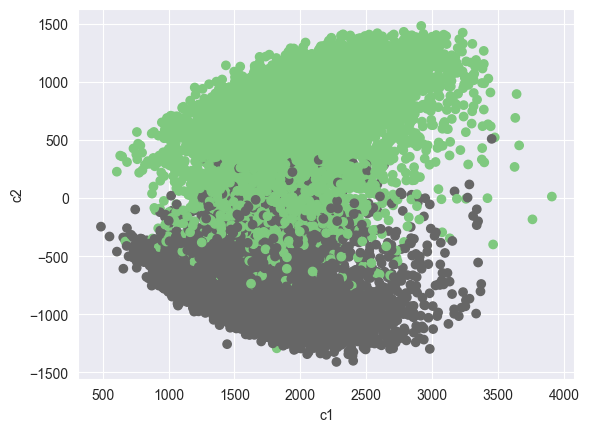

In [94]:
# Apply SVD with 2 components
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Plot the 2 new features generated by SVD
plt.scatter(X_train_svd[:,0], X_train_svd[:,1], c=y_train.astype('int32'), cmap='Accent')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

In [95]:
# Train logistic regression on reduced dataset
clf2 = LogisticRegression(random_state=0).fit(X_train_svd, y_train)

# Test score
score2 = clf2.score(X_test_svd, y_test)

# Confusion matrix
predictions2 = clf2.predict(X_test_svd)
cm2 = metrics.confusion_matrix(y_true=y_test, y_pred=predictions2, labels=clf2.classes_)
print('Confusion Matrix:', "\n", cm2, "\n"*2)

# Evaluate the model using classification_report for accuracy, precision, and recall
cr2 = metrics.classification_report(y_test, predictions2, target_names=clf2.classes_)
print('Classification Report:', "\n", cr2)

Confusion Matrix: 
 [[1305   80]
 [  42 1319]] 


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1385
           8       0.94      0.97      0.96      1361

    accuracy                           0.96      2746
   macro avg       0.96      0.96      0.96      2746
weighted avg       0.96      0.96      0.96      2746



### dimensionality reduction to 2 features using _t-SNE_

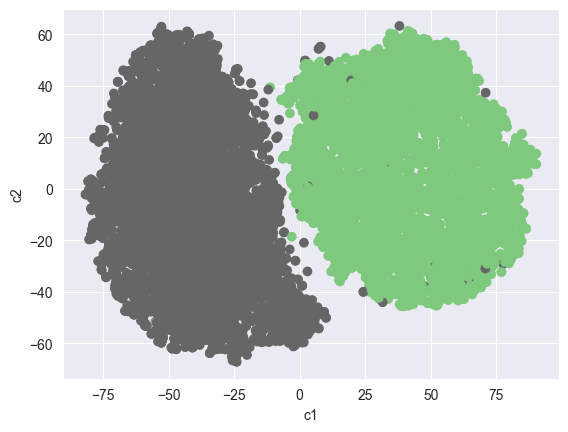

In [96]:
from sklearn.manifold import TSNE

# Apply t-SNE with 2 components
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

# Plot the 2 new features generated by t-SNE
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=y_train.astype('int32'), cmap='Accent')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

In [97]:
# Train logistic regression on reduced dataset
clf3 = LogisticRegression(random_state=0).fit(X_train_tsne, y_train)

# Test score
score3 = clf3.score(X_test_tsne, y_test)

# Confusion matrix
predictions3 = clf3.predict(X_test_tsne)
cm3 = metrics.confusion_matrix(y_true=y_test, y_pred=predictions3, labels=clf3.classes_)
print('Confusion Matrix:', "\n", cm3, "\n"*2)

# Evaluate the model using classification_report for accuracy, precision, and recall
cr3 = metrics.classification_report(y_test, predictions3, target_names=clf3.classes_)
print('Classification Report:', "\n", cr3)

Confusion Matrix: 
 [[1383    2]
 [   3 1358]] 


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1385
           8       1.00      1.00      1.00      1361

    accuracy                           1.00      2746
   macro avg       1.00      1.00      1.00      2746
weighted avg       1.00      1.00      1.00      2746



### How different are these results from those of your implementation? Why?

XXXXXXX